In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [4]:
params = {
"program1": (-0.01, 0.05),
"program2": (-0.005, 0.05),
"program3": (-0.05, 0.1),
}


names = {
  "program1": "Program 1",
"program2": "Program 2",
"program3": "Program 3"  
}

sigmas = {
  "program1": 4.,
  "program2": 4.,
  "program3":  6. 
}

program_sizes = {
  "program1": 80,
  "program2": 40,
  "program3":  10 
}

programs = ["program1", 
            "program2",
            "program3"]
  
### Or we can load it from data


### Discretization Parameters
N = 250e6
N_step = 1e4 # this should be smaller than $N/I$
I = 1000
I_step = 25

mpfs = {}

# for program in programs:
#   arr = np.load(f"../../data/{program}_metaproduction_array_N_step{N_step}_I_step{I_step}.npy")
#   idx = np.searchsorted(np.arange(1,I,I_step), program_sizes[program])
#   mpfs[program] = arr[idx,:]

# mus_p = np.array([max(params[program][0],0) for program in programs])
# print(mus_p)


In [6]:
opt_vals, opt_indexes, res = solve_multiple_program_dp(programs, mpfs, N, N_step)

In [12]:
allocations = {}

for i in range(len(programs)):
    print(f"{obf_names[programs[i]]} Allocation: {res[i]*N_step:,}")
    allocations[programs[i]] = res[i]

Program 1 Allocation: 112,110,000.0
Program 2 Allocation: 88,740,000.0
Program 3 Allocation: 49,140,000.0


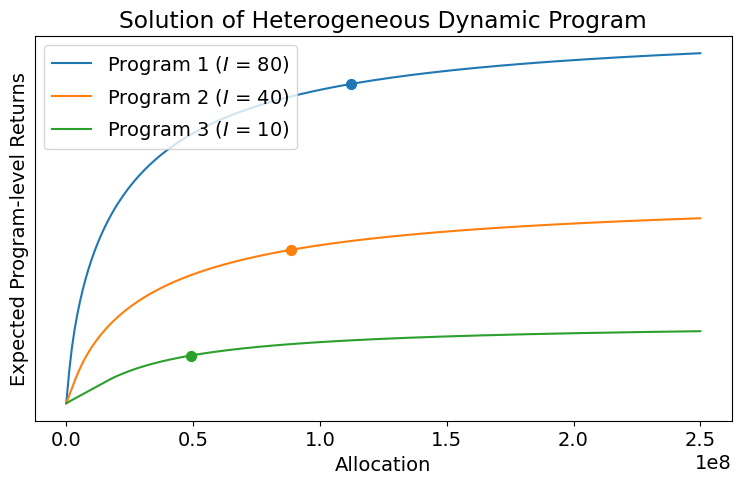

In [16]:
plt.figure(figsize = (9,5))

plt.rcParams['font.size'] = 14
N_range = np.arange(1,N, N_step)

obf_names = {
  "personalization": "Program 1",
"ui_existing_members": "Program 2",
"ui_new_to_device": "Program 3"  
}

#C = (np.pi**5)/np.e**2
C = 1

for program in programs:
    line, = plt.plot(N_range, C*mpfs[program], label = f"{obf_names[program]} ($I$ = {program_sizes[program]})")
    a = int(allocations[program])
    plt.scatter(a*N_step,C*mpfs[program][a], s = 50, color = line.get_color())

plt.legend()
plt.title(f"Solution of Heterogeneous Dynamic Program")
plt.ylabel("Expected Program-level Returns")
plt.xlabel("Allocation")
plt.yticks([])
plt.savefig("../../figures/meta_production_byprogram.pdf", bbox_inches = 'tight')
plt.show()